In [1]:
from wgangp_acc.db_utils import *

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [2]:
db = np.load('../databases/velocities.npy')

In [10]:
from tensorflow.image import image_gradients
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
def derive():
    sig_input = Input(shape=(2000,1))
    x = sig_input
    x = K.reshape(x, (-1,2000,1,1))
    x = image_gradients(x)[0]
    x = K.reshape(x, (-1,2000,1))
    #x = np.gradient(sig_input, axis=1)
    #generator.add(Reshape((2000, 1)))

    
    d_model = Model(sig_input, x)
    d_model.summary()
    return d_model

In [11]:
deriver = derive()
#weights

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2000, 1)]    0                                            
__________________________________________________________________________________________________
tf_op_layer_Reshape_8 (TensorFl [(None, 2000, 1, 1)] 0           input_3[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Shape_2 (TensorFlow [(4,)]               0           tf_op_layer_Reshape_8[0][0]      
__________________________________________________________________________________________________
tf_op_layer_unstack_2 (TensorFl [(), (), (), ()]     0           tf_op_layer_Shape_2[0][0]        
____________________________________________________________________________________________

In [12]:
aa = deriver.predict(db[1:2,:,0:1])

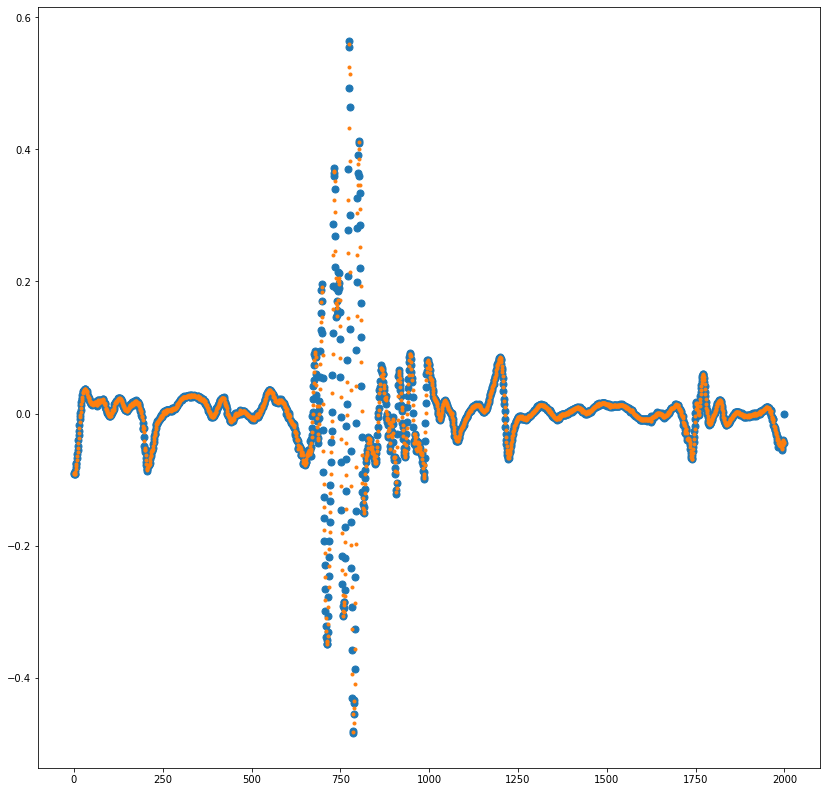

In [13]:
plt.figure(figsize=(14,14))
plt.plot(aa[0,:,0],lw=0,marker='o',ms=7)
#plt.plot(db[0,:,0])
plt.plot(np.gradient(db[1,:,0]),lw=0,marker='o',ms=3)